### Keras API Project

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv(r'C:/Users/LENOVO/Downloads/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_info.csv', index_col='LoanStatNew')

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
print(data_info.loc['total_acc']['Description'])

The total number of credit lines currently in the borrower's credit file


In [5]:
def feat_info(columns):
    print(data_info.loc[columns]['Description'])

In [6]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


### Loading the data and other imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv(r'C:/Users/LENOVO/Downloads/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

### Section 1: Exploratory Data Analyis

In [10]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<Axes: xlabel='loan_status', ylabel='count'>

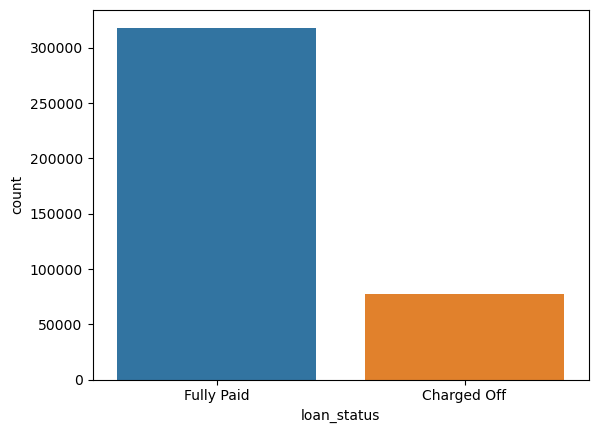

In [11]:
sns.countplot(data=df,x='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

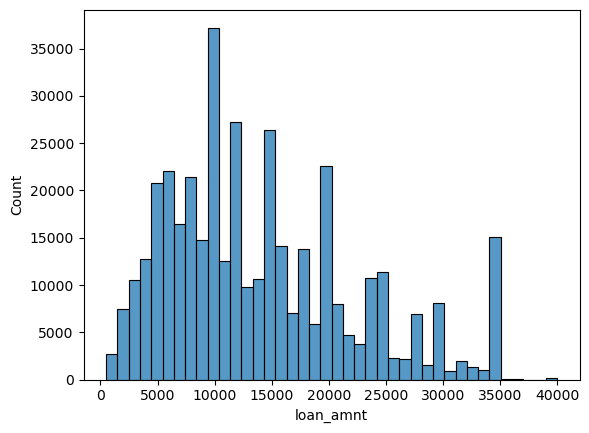

In [12]:
sns.histplot(data=df,x='loan_amnt',bins=40)

<Figure size 1200x400 with 0 Axes>

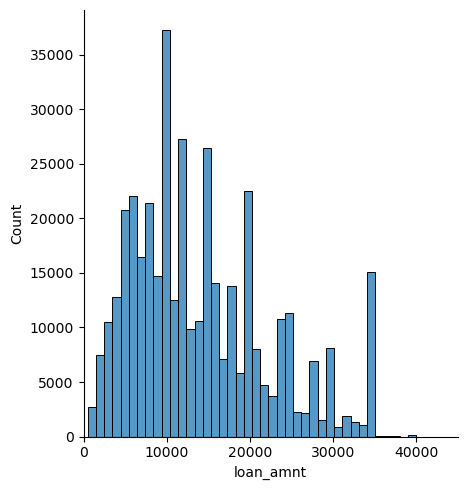

In [13]:
plt.figure(figsize=(12,4))
sns.displot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)
plt.tight_layout()

(0.0, 45000.0)

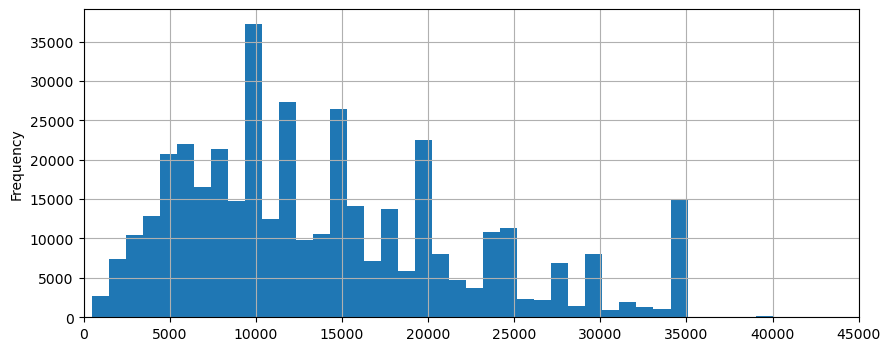

In [14]:
plt.figure(figsize=(10,4))
df['loan_amnt'].plot(kind='hist',bins=40,grid=True)
plt.xlim(0,45000)

In [15]:
df.drop(['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d',
                 'loan_status','purpose','title','earliest_cr_line','initial_list_status','application_type','address'],axis=1,inplace=True)
df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [16]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


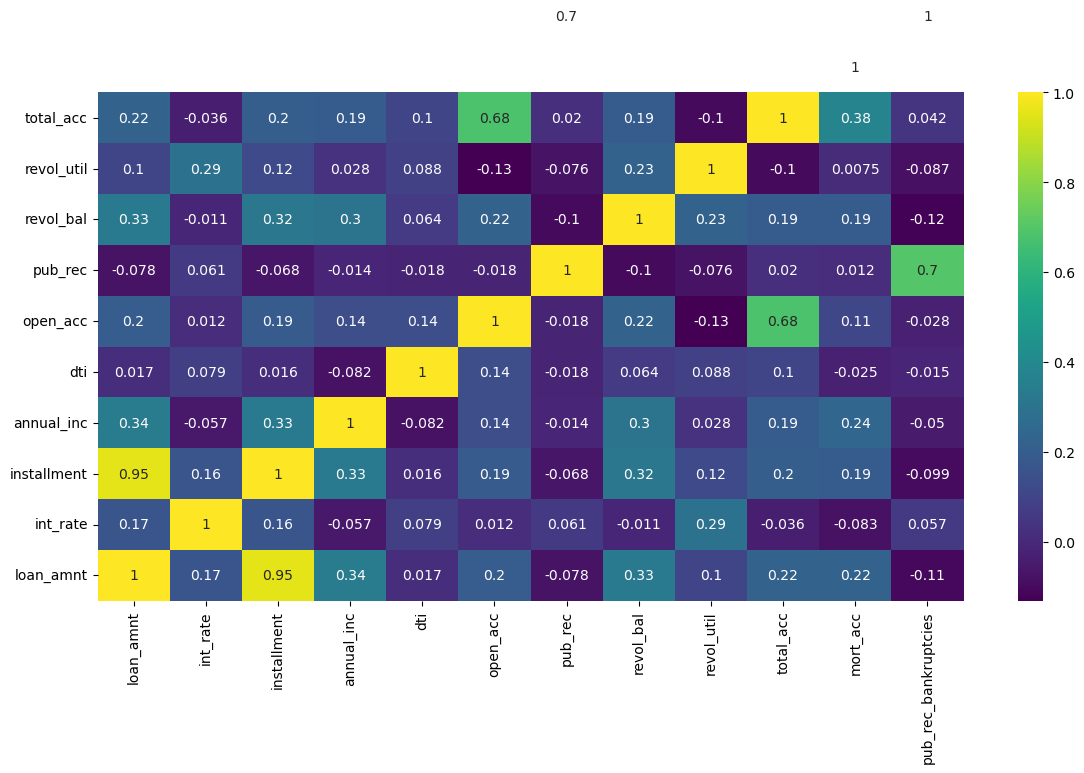

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(0,10)
plt.tight_layout()

In [18]:
df = pd.read_csv(r'C:/Users/LENOVO/Downloads/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [19]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [20]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

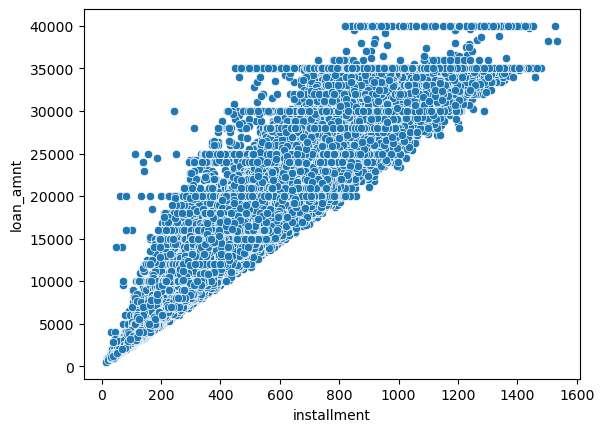

In [21]:
sns.scatterplot(data=df,x='installment',y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

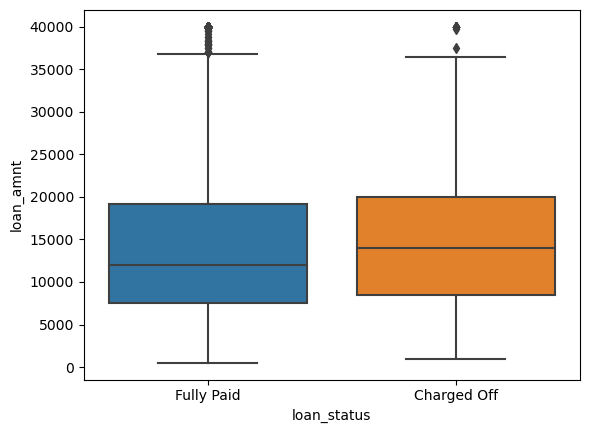

In [22]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

In [23]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [24]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [25]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

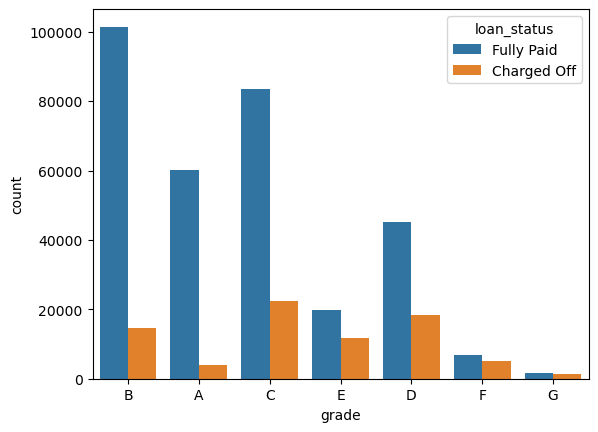

In [26]:
sns.countplot(data=df,x='grade',hue='loan_status')

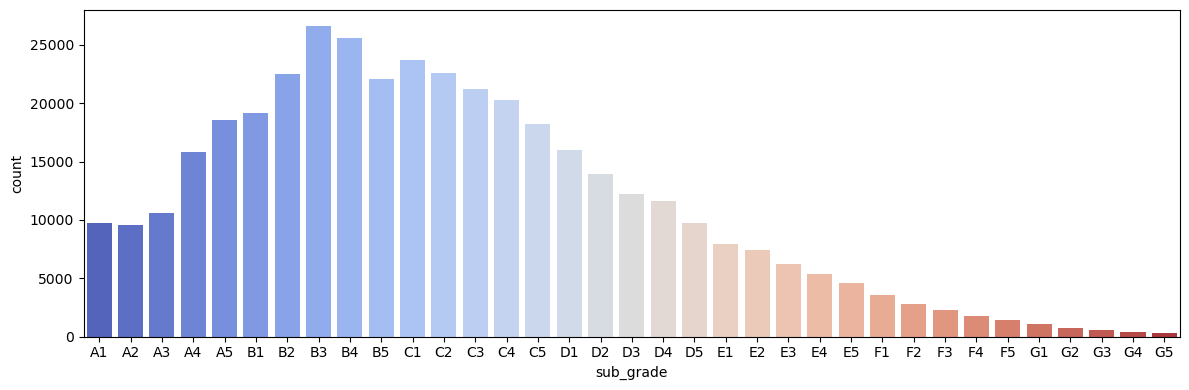

In [27]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')
plt.tight_layout()

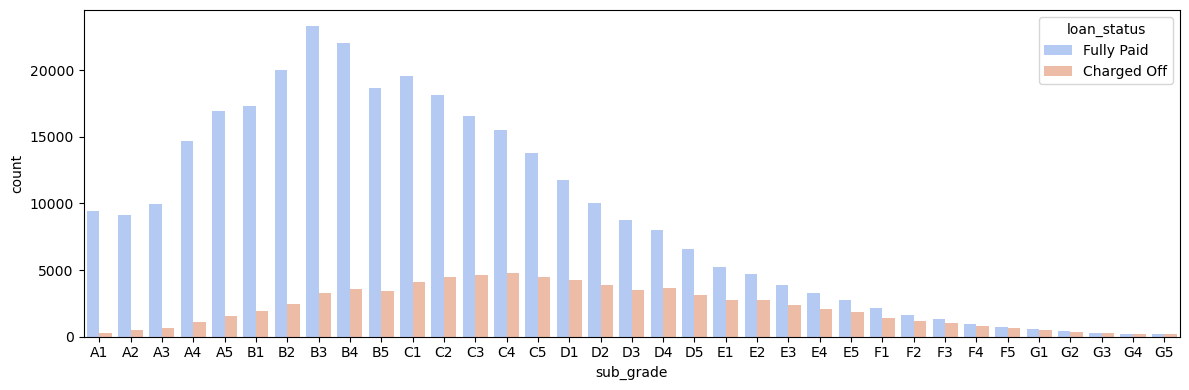

In [28]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')
plt.tight_layout()

In [29]:
# plt.figure(figsize=(12,4))
# subgrade_order = sorted(df['sub_grade'].unique())
# sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')
# plt.tight_layout()

<Axes: xlabel='sub_grade', ylabel='count'>

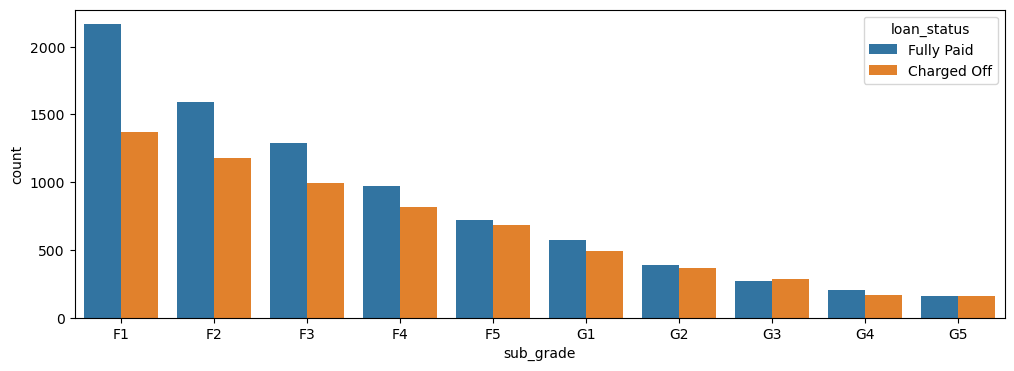

In [30]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [31]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [32]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [33]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [34]:
df.drop(['term','grade','sub_grade','emp_title','emp_length','home_ownership','verification_status','issue_d',
                 'loan_status','purpose','title','earliest_cr_line','initial_list_status','application_type','address'],axis=1,inplace=True)

In [35]:
#df = pd.read_csv(r'C:/Users/LENOVO/Downloads/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

<Axes: >

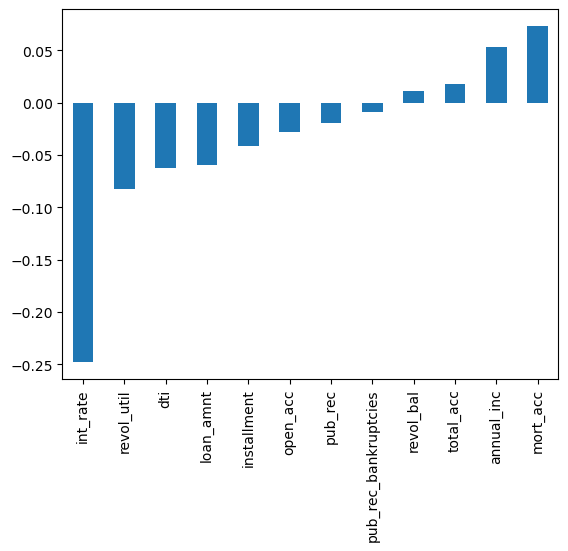

In [36]:
df.corr()['loan_repaid'].sort_values().iloc[:-1].plot(kind='bar')

## How to treat Missing Data

In [37]:
df = pd.read_csv(r'C:/Users/LENOVO/Downloads/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [38]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [39]:
len(df)

396030

In [40]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [41]:
100 * df.isnull().sum() / len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [42]:
feat_info(['emp_title','emp_length'])

LoanStatNew
emp_title     The job title supplied by the Borrower when ap...
emp_length    Employment length in years. Possible values ar...
Name: Description, dtype: object


In [43]:
df['emp_title'].nunique()

173105

In [44]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [45]:
df = df.drop('emp_title',axis=1)

In [46]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [47]:
emp_length_order = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

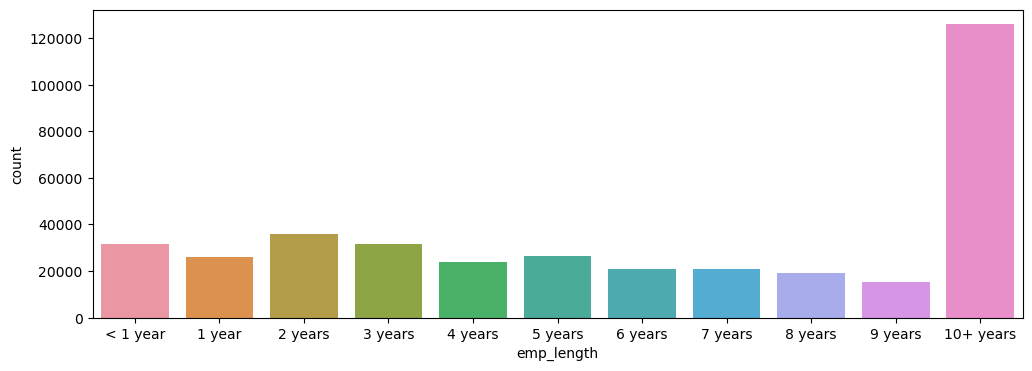

In [48]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

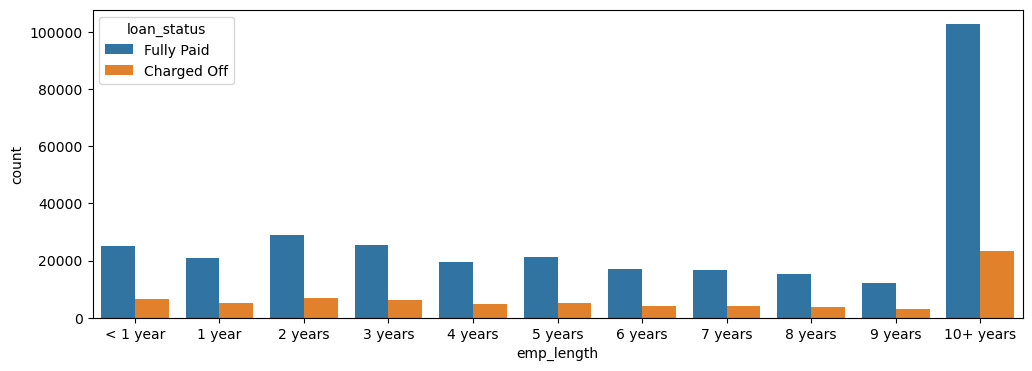

In [49]:
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order,hue='loan_status')

* CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a bar plot. This may be tricky, refer to solutions if you get stuck on creating this Series.

In [50]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [51]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [52]:
emp_co / emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [53]:
emp_len = 100 * emp_co / (emp_co + emp_fp)

<Axes: xlabel='emp_length'>

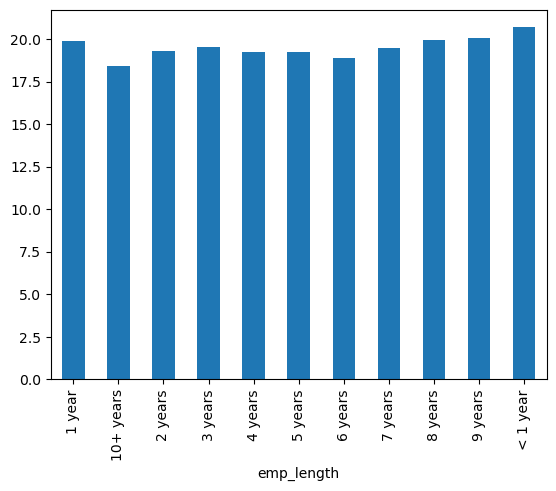

In [54]:
emp_len.plot(kind='bar')

In [55]:
df = df.drop('emp_length', axis=1)

In [56]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [57]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [58]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [59]:
feat_info('title')

The loan title provided by the borrower


In [60]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [61]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [62]:
df = df.drop('title',axis=1)

In [63]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [64]:
feat_info('mort_acc')

Number of mortgage accounts.


In [65]:
df = df.drop('term',axis=1)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  object 
 4   sub_grade             396030 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   issue_d               396030 non-null  object 
 9   loan_status           396030 non-null  object 
 10  purpose               396030 non-null  object 
 11  dti                   396030 non-null  float64
 12  earliest_cr_line      396030 non-null  object 
 13  open_acc              396030 non-null  float64
 14  pub_rec               396030 non-null  float64
 15  

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [67]:
df = df.drop(['grade','sub_grade','home_ownership','verification_status','issue_d','loan_status',
              'purpose','earliest_cr_line','initial_list_status','application_type','address'],axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   annual_inc            396030 non-null  float64
 4   dti                   396030 non-null  float64
 5   open_acc              396030 non-null  float64
 6   pub_rec               396030 non-null  float64
 7   revol_bal             396030 non-null  float64
 8   revol_util            395754 non-null  float64
 9   total_acc             396030 non-null  float64
 10  mort_acc              358235 non-null  float64
 11  pub_rec_bankruptcies  395495 non-null  float64
dtypes: float64(12)
memory usage: 36.3 MB


In [69]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [70]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [71]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

Here we are using this function:
**How to apply a function to two columns of Pandas dataframe**

In [72]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [73]:
df['mort_acc'] = df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [74]:
df.isna().sum()

loan_amnt                 0
int_rate                  0
installment               0
annual_inc                0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
mort_acc                  0
pub_rec_bankruptcies    535
dtype: int64

In [75]:
df = df.drop(['revol_bal','pub_rec_bankruptcies'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_amnt    396030 non-null  float64
 1   int_rate     396030 non-null  float64
 2   installment  396030 non-null  float64
 3   annual_inc   396030 non-null  float64
 4   dti          396030 non-null  float64
 5   open_acc     396030 non-null  float64
 6   pub_rec      396030 non-null  float64
 7   revol_util   395754 non-null  float64
 8   total_acc    396030 non-null  float64
 9   mort_acc     396030 non-null  float64
dtypes: float64(10)
memory usage: 30.2 MB


### Here We are Dealing with Categorical Variables and Dummy Variables

In [76]:
df = pd.read_csv(r'C:/Users/LENOVO/Downloads/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [78]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [79]:
df = df.drop('emp_title',axis=1)

In [80]:
df = df.drop('emp_length', axis=1)

In [81]:
df = df.drop('title',axis=1)

In [82]:
# df = df.drop('term',axis=1)

In [83]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [84]:
df['mort_acc'] = df.apply(lambda x:fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [85]:
df = df.drop(['revol_bal','pub_rec_bankruptcies'],axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  object 
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   grade                396030 non-null  object 
 5   sub_grade            396030 non-null  object 
 6   home_ownership       396030 non-null  object 
 7   annual_inc           396030 non-null  float64
 8   verification_status  396030 non-null  object 
 9   issue_d              396030 non-null  object 
 10  loan_status          396030 non-null  object 
 11  purpose              396030 non-null  object 
 12  dti                  396030 non-null  float64
 13  earliest_cr_line     396030 non-null  object 
 14  open_acc             396030 non-null  float64
 15  pub_rec          

In [87]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [88]:
def feat_info(columns):
    print(data_info.loc[columns]['Description'])

In [89]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [90]:
df['term'].value_counts()

term
 36 months    302005
 60 months     94025
Name: count, dtype: int64

In [91]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [92]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

In [93]:
df = df.drop('grade',axis=1)

In [94]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [95]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True,dtype=int)

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [96]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'],
      dtype='object')

In [97]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True,dtype=int)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [98]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [99]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [100]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [101]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [102]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True,dtype=int)

df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [103]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [104]:
def feat_zip_code(address):
    address = address.split()
    return address[-1]

In [105]:
df['zip_code'] = df['address'].apply(feat_zip_code)

In [106]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 396030, dtype: object

In [107]:
df['zip_code'].value_counts()

zip_code
70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: count, dtype: int64

In [108]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True,dtype=int)

In [109]:
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [110]:
df = df.drop('address',axis=1)

In [111]:
feat_info('issue_d')

The month which the loan was funded


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   issue_d                              396030 non-null  object 
 6   loan_status                          396030 non-null  object 
 7   dti                                  396030 non-null  float64
 8   earliest_cr_line                     396030 non-null  object 
 9   open_acc                             396030 non-null  float64
 10  pub_rec                              396030 non-null  float64
 11  revol_util   

In [113]:
feat_info('issue_d')

The month which the loan was funded


In [114]:
df = df.drop('issue_d',axis=1)

In [115]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [116]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [117]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:date[-4:])

In [118]:
df['earliest_cr_line'].astype(int)

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 396030, dtype: int32

In [119]:
df['loan_repaid'] = df['loan_status'].replace({'Fully Paid':1, 'Charged Off':0})

In [120]:
df = df.drop('loan_status',axis=1)

In [121]:
X = df.drop('loan_repaid',axis=1).values

In [122]:
y = df['loan_repaid'].values

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
scaler = MinMaxScaler()

In [126]:
X_train = scaler.fit_transform(X_train)

In [127]:
X_test = scaler.transform(X_test)

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [129]:
model = Sequential()

model.add(Dense(76,activation='relu'))
model.add(Dropout(0.2))
9
model.add(Dense(38,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [130]:
X_train.shape

(316824, 76)

In [131]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.5146 - val_loss: 0.4944
Epoch 2/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.4997 - val_loss: 0.4942
Epoch 3/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.4976 - val_loss: 0.4948
Epoch 4/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.4965 - val_loss: 0.4943
Epoch 5/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.4959 - val_loss: 0.4943
Epoch 6/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.4956 - val_loss: 0.4943
Epoch 7/25
1238/1238 [==============================] - 3s 2ms/step - loss: 0.4954 - val_loss: 0.4943
Epoch 8/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.4953 - val_loss: 0.4943
Epoch 9/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.4953 - val_loss: 0.4943
Epoch 10/25
1238/1238 [==============================] - 2s 2ms/step - loss: 0.495

In [132]:
from tensorflow.keras.models import load_model

In [133]:
losses = pd.DataFrame(model.history.history)

In [134]:
model.save('full_data_project_model1.h5')

<Axes: >

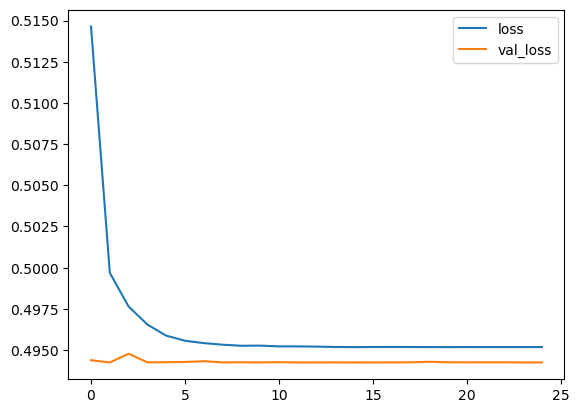

In [135]:
losses[['loss','val_loss']].plot()

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [137]:
predictions = model.predict(X_test > 0.5).astype(int)

2476/2476 [==============================] - 2s 717us/step


In [138]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33     15493
           1       0.00      0.00      0.00     63713

    accuracy                           0.20     79206
   macro avg       0.10      0.50      0.16     79206
weighted avg       0.04      0.20      0.06     79206



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
confusion_matrix(y_test,predictions)

array([[15493,     0],
       [63713,     0]], dtype=int64)

In [140]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer.astype(float)

loan_amnt      24000.00
term              60.00
int_rate          13.11
installment      547.43
annual_inc     85000.00
                 ...   
30723              0.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 304691, Length: 76, dtype: float64

In [142]:
new_customer = scaler.transform(new_customer.values.reshape(1,76))

In [143]:
model.predict(new_customer)

1/1 [==============================] - 0s 49ms/step


array([[0.80531365]], dtype=float32)

In [ ]:
df.iloc[random_ind]['loan_repaid']

In [144]:
df.iloc[random_ind]['loan_repaid']

1